# Hopfield Network Attractor Project

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import imageio as iio
from PIL import Image

import hopfield
import learning_rules as lrn
import activation_functions as afn
import utilities as uti


# Basic classes, util functions, activation functions

# Dataset Preparation

### Dataset 2 (Demo, whole letters)

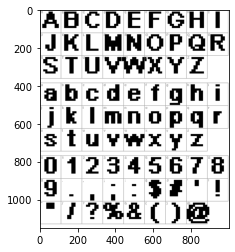

In [11]:
# read an image
img = iio.imread("./images/pixel-arial-11-font-character-map.png")
# print(img.shape)
plt.imshow(img)

In [12]:
# Calculate all letters up to resolution 100

LETTERS_RESOLUTION = [uti.generate_all_letter_dataset(img, new_size=1)]
for i in range(0, 100):
    LETTERS_RESOLUTION.append(uti.generate_all_letter_dataset(img, new_size = i+1))

TypeError: generate_all_letter_dataset() got multiple values for argument 'new_size'

In [ ]:
# # Set the letter resolution

# all_letter_final = uti.generate_all_letter_dataset(img, new_size = 6)
# # print(all_letter_final)
# print(all_letter_final.shape)
# for i in range(9):
#     for j in range(9):
#         arr = all_letter_final[9 * i + j]
#         ax = plt.subplot(9, 9, i * 9 + j + 1)
#         show_letter(arr, ax)

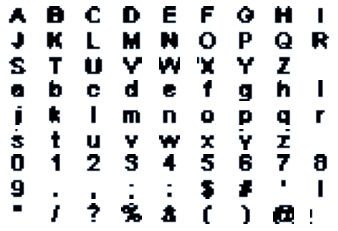

In [ ]:
LETTERS_RESOLUTION[10].shape
all_letter_final = LETTERS_RESOLUTION[10]
for i in range(9):
    for j in range(9):
        arr = all_letter_final[9 * i + j]
        ax = plt.subplot(9, 9, i * 9 + j + 1)
        uti.show_letter(arr, ax)

### Dataset 3 (MNIST)

In [ ]:
# from sklearn.datasets import fetch_openml

# # GET mnist data
# mnist = fetch_openml(name='mnist_784', as_frame = False)
# mnist_X = mnist.data
# mnist_X.shape

# import matplotlib.pyplot as plt
# show_first_n = 10
# for i in range(show_first_n):
#   plt.subplot(1, show_first_n, i +1)
#   plt.imshow(mnist_X[i].reshape(28, 28))

### Dataset 4(Demyan)

In [ ]:
# all_images_dem = np.empty((6, 200 * 200))
all_images_dem = np.empty((6, 50 * 50))
for i in range(6):
  img = iio.imread(f"./images/hand_drawn/dem_{i+1}.jpg")
  print(img.shape)
  new_img = img.copy().astype("int")
  new_img[new_img < 100] = -1
  new_img[new_img >= 100] = 1
  new_img = new_img[::4, ::4]
  all_images_dem[i] = new_img.reshape(-1).copy()

# img = iio.imread(f"/content/drive/MyDrive/Attractor Network Project/Images/Hand Drawn/dem_1.jpg")
# all_images_dem.shape
# plt.hist(img.reshape(-1))
# img_set = set(tuple(img.reshape(-1).tolist()))
# print(img_set)

(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)


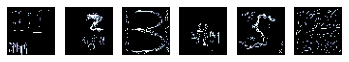

In [ ]:
fig, axs = plt.subplots(1, 6)
for i in range(6):
  uti.show_letter(all_images_dem[i], axs[i])


# Training and validation process

### Demo for dataset 2

In [ ]:
# Setup and train
np.random.seed(0)
letter_index = [0,1 ,2,3]
letter_res = 4

all_letter_dataset = LETTERS_RESOLUTION[letter_res][letter_index]

all_letter_dataset = np.random.randint(0, 1)
n_image, image_size = all_letter_dataset.shape
print(f"Num of images = {n_image}")

hop_net = hopfield.HopfieldNetwork()
hop_net.TS_hebbian(all_letter_dataset)

# alphabet preview
letter_preview = LETTERS_RESOLUTION[letter_res]
print(letter_preview.shape)
for i in range(9):
    for j in range(9):
        arr = letter_preview[9 * i + j]
        ax = plt.subplot(9, 9, i * 9 + j + 1)
        uti.show_letter(arr, ax)

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
for (i, j) in [(0, 1), (0, 2), (0, 3)]:
  print(i, j, np.corrcoef(all_letter_dataset[i], all_letter_dataset[j])[0][1])



In [ ]:
# TODO: try to implement this thing where it shows the letters we're using?
# I duno how to do it in one plot...

# Show chosen letters
# for i, ltr in enumerate(all_letter_dataset):
#     ax = plt.subplot(2, graph_len, i+1)
#     show_letter(ltr, ax)

# Run the inference

noise_level = .0
# n_test_samples = 1000
n_test_samples = 10
n_iter = 100
show_last_n_letters = 3
for i in range(n_test_samples):
    # pick random image
    letter_idx = np.random.randint(0, n_image)

    # set custom letter index
    # letter_idx = 1

    # add noise
    x_test = all_letter_dataset[letter_idx].copy()
    x_test = uti.add_noise(x_test, noise_level=noise_level)
    Xs = hop_net.IS_tanh_threshold(x_test, N=n_iter)

    # plot input
    ax = plt.subplot(n_test_samples, 2, i*2+1)
    uti.show_letter(x_test, ax)
    ax = plt.subplot(n_test_samples, 2, i*2+2)
    uti.show_letter(Xs[-1], ax)

    # # plot last n entries
    # for i, X in enumerate(Xs[-3:]):
    #     ax = plt.subplot(1, show_last_n_letters + 2, i+3)
    #     show_letter(X, ax)
        
    # TODO: evaluate the function

### A demo for validation

In [ ]:
# np.random.seed(0)

# all_letter_dataset = uti.generate_all_letter_dataset(img, new_size = 150)
# all_letter_dataset = all_letter_dataset[[10, 20, 30, 5]]
# # all_letter_dataset = all_letter_dataset[::-1]
# n_image, image_size = all_letter_dataset.shape
# print(f"Num of images = {n_image}")

# hop_net = HopfieldNetwork()
# hop_net.TS_hebbian(all_letter_dataset)

# noise_level = .20
# # n_test_samples = 1000
# n_test_samples = 1
# n_iter = 1000
# for i in range(n_test_samples):
#     # add noise
#     # random_idx = np.random.randint(0, n_image - 1)
#     random_idx = 3
#     print(random_idx)
#     x_test = all_letter_dataset[random_idx].copy()
#     x_test = add_noise(x_test, noise_level=noise_level)
#     is_correct, error = hop_net.score(x_test, random_idx)
#     print(is_correct, error)
#     if i == 0:
#       fig, axs = plt.subplots(1, 6)
#       show_letter(all_letter_dataset[0], axs[0])
#       show_letter(all_letter_dataset[1], axs[1])
#       show_letter(all_letter_dataset[2], axs[2])
#       show_letter(all_letter_dataset[3], axs[3])
#       show_letter(x_test, axs[4])
#       show_letter(hop_net.IS_tanh_threshold(x_test)[-1], axs[5])
   

### Demo for dataset 3

In [ ]:
mnist_X[0].min(),mnist_X[0].max()

In [ ]:
n_images = 10
all_letter_dataset = mnist_X[:n_images].copy()
all_letter_dataset[all_letter_dataset < 10] = -1
all_letter_dataset[all_letter_dataset >= 10] = 1

for i in range(n_images):
  ax = plt.subplot(1, n_images, i+1)
  uti.show_letter(all_letter_dataset[i], ax)


In [ ]:
hop_net = hopfield.HopfieldNetwork()
hop_net.TS_hebbian(all_letter_dataset)

noise_level = .20
# n_test_samples = 1000
n_test_samples = 50
n_iter = 1000
for i in range(n_test_samples):
    # add noise
    random_idx = np.random.randint(0, n_images)
    # random_idx = 3
    x_test = all_letter_dataset[random_idx].copy()
    x_test = uti.add_noise(x_test, noise_level=noise_level)
    Xs = hop_net.IS_tanh_threshold(x_test, 10)
    is_correct, error = hop_net._validate(x_test, random_idx)
    print(random_idx, is_correct, error)

    ax = plt.subplot(n_test_samples, 2, i * 2 +1)
    uti.show_letter(x_test, ax)
    ax = plt.subplot(n_test_samples, 2, i * 2 +2)
    uti.show_letter(Xs[-1], ax)


In [ ]:
import seaborn as sns
sns.heatmap(hop_net.weights)

In [ ]:
sns.heatmap(hop_net.weights[:100, :100])

### Demo for Dataset 4

In [ ]:
# all_images_dem
hop_net = uti.HopfieldNetwork()
hop_net.TS_storkey(all_images_dem)

noise_level = .0
# n_test_samples = 1000
n_test_samples = 1
n_iter = 1000
n_images = len(all_images_dem)
for i in range(n_test_samples):
    # add noise
    # random_idx = np.random.randint(0, n_images)
    random_idx = 2
    x_test = all_images_dem[random_idx].copy()
    x_test = uti.add_noise(x_test, noise_level=noise_level)
    Xs = hop_net.IS_tanh_threshold(x_test, 10)
    is_correct, error = hop_net._validate(x_test, random_idx)
    print(random_idx, is_correct, error)

    ax = plt.subplot(n_test_samples, 2, i * 2 + 1)
    uti.show_letter(x_test, ax)
    ax = plt.subplot(n_test_samples, 2, i * 2 + 2)
    uti.show_letter(Xs[-1], ax)


# Let's do experiments

### Exp 1: only changing number of neurons

In [ ]:
res = 16
ninput = 4
noise_level = .20
# n_test_samples = 1000
n_test_samples = 10
n_iter = 4
show_last_n_letters = 3
np.random.seed(4)

def do_test(res, dataset, noise_level, n_test_samples, show_last_n_letters):
  ninput = dataset.shape[0]
  hop_net = hopfield.HopfieldNetwork()
  hop_net.TS_hebbian(dataset)
  # for i in range(ninput):
  #   ax = plt.subplot(1, ninput, i+1)
  #   show_letter(dataset[i], ax)
  pm = PerformanceMetric()

  for i in range(n_test_samples):
    # pick random image
    letter_idx = np.random.randint(0, ninput - 1)
    # set custom letter index
    # letter_idx = 1

    # add noise
    x_test_raw = all_letter_dataset[letter_idx].copy()
    x_test = uti.add_noise(x_test_raw, noise_level=noise_level)
    Xs = hop_net.IS_tanh_threshold(x_test, N=n_iter)
    
    is_correct, error = hop_net._validate(Xs[-1], letter_idx)
    # print(hop_net.time())
    # print(hop_net.energy())
    # print(is_correct, error)
    pm.time.append(hop_net.time())
    pm.energy.append(hop_net.energy())
    pm.is_correct.append(is_correct)
    pm.error.append(error)
  return pm
    
    # print(hop_net.perf())
    # # plot input
    # ax = plt.subplot(1, show_last_n_letters + 1, 1)
    # show_letter(x_test_raw, ax)

    # # plot last n entries
    # for i, X in enumerate(Xs[-3:]):
    #     ax = plt.subplot(1, show_last_n_letters + 1, i+2)
    #     show_letter(X, ax)

# this_letter_dataset = LETTERS_RESOLUTION[letter_res][range(0, ninput)]
all_letter_dataset = mnist_X[:ninput]
pm = do_test(res, all_letter_dataset, noise_level, n_test_samples, show_last_n_letters)

In [ ]:
# pms = []
# min_res, max_res = 1, 10
# n_test_samples = 30
# neurons = [x**2 for x in range(min_res, max_res)]
# np.random.seed(10)
# for res in range(min_res, max_res):
#   pm = do_test(res, ninput, noise_level, n_test_samples, show_last_n_letters)
#   pms.append(pm)

# Plots


In [ ]:
pms = [pm]
neurons = [28 * 28]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# 1
ax_num_acc = axs[0][0]
ax_num_acc.plot(neurons, [np.mean(pm.is_correct) for pm in pms])
ax_num_acc.set_xlabel('#Neurons')
ax_num_acc.set_ylabel("Accuracy")
ax_num_acc.set_xticks(neurons)
ax_num_acc.set_title(f"#Neuron v.s. Accuracy (#trial = {n_test_samples}, #input_sample={ninput})")


# ax timestep accuracy
ax_time_acc = axs[0][1]
ax_time_acc.scatter([np.mean(pm.time) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
ax_time_acc.set_xlabel(f"Mean timestamp on {n_test_samples} trials")
ax_time_acc.set_ylabel("Accuracy")
ax_time_acc.set_title("Mean timestamp v.s. Accuracy")

# ax energy accuracy
ax_energy_acc = axs[1][0]
ax_energy_acc.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
ax_energy_acc.set_xlabel(f"Mean energy on {n_test_samples} trials")
ax_energy_acc.set_ylabel("Accuracy")
ax_energy_acc.set_title("Mean energy v.s. Accuracy")

# ax energy accuracy
ax_energy_time = axs[1][1]
ax_energy_time.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.time) for pm in pms])
ax_energy_time.set_xlabel("Mean energy")
ax_energy_time.set_ylabel("Mean Timestamp")
ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")


### Exp2: Change the learning rule / activation functin

# Plotting Template

In [ ]:
# neurons = [25, 36, 49, 64, 81]
# accuracy = [0.5, 0.6, 0.7, 0.8, 0.9]
# time = [10, 50, 30, 10, 20]

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# ax1.plot(neurons, accuracy)
# ax1.set_xlabel("#Neurons")
# ax1.set_ylabel("Accuracy")
# ax1.set_ylim(0, 1)

# ax2.plot(neurons, time)
# ax2.set_xlabel("#Neurons")
# ax2.set_ylabel("Time")

# ax3.plot(time, accuracy)
# ax3.set_xlabel("Time")
# ax3.set_ylabel("Accuracy")
# ax3.set_ylim(0, 1)